![crack](https://cdn.radiofrance.fr/s3/cruiser-production/2021/01/1888eb1e-654a-4ab4-835b-581cf76844f7/1200x680_titanic.jpg)

# Titanic 

Let's start using classifications on a very popular dataset: **Titanic**. 

We're going to make an algorithm together that will try to predict who will survive to the titanic crash based on many variables.

Your goal will be to: 

1. Preprocess the data 
2. Create a classification algorithm 

Happy Coding!

## Step 1 - Import Data

- Import usual librairies

In [125]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

- Import `titanic.csv` and visualize dataset

In [126]:
df = pd.read_csv("../99-assets/ML/titanic.csv")
print("Type de df :", type(df), df.shape)  
df.head(10)

Type de df : <class 'pandas.core.frame.DataFrame'> (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- Remove `PassengerId`, `Name`, `Ticket`, `Cabin` columns from the dataset

In [127]:
print("Type de df :", type(df), df.shape)  
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

print("Type de df :", type(df), df.shape)  
df.head()

Type de df : <class 'pandas.core.frame.DataFrame'> (891, 12)
Type de df : <class 'pandas.core.frame.DataFrame'> (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Step 2 - EDA

- Visualize `Sex` and `Survived`

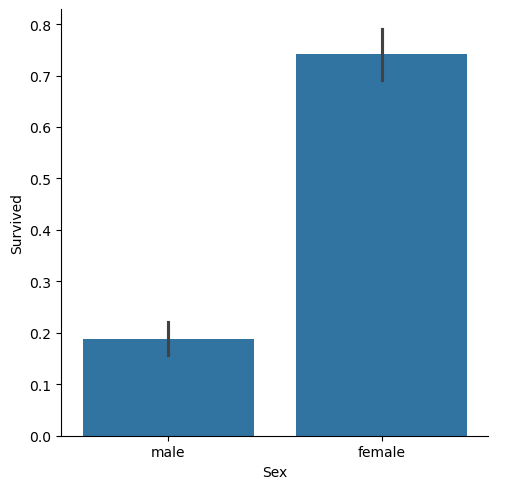

In [129]:
#df["Sex"].replace(["male", "female"], [0,1], inplace=True)

# t = 1.96
# n = len(df)
# err = t * df.std() / n**0.5
# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars


_=sns.catplot(df, x="Sex", y="Survived", kind="bar")
# _=sns.catplot(df, x="Sex", y="Survived", kind="bar", hue="Sex")



- Visualize `SibSp` and `Survived`

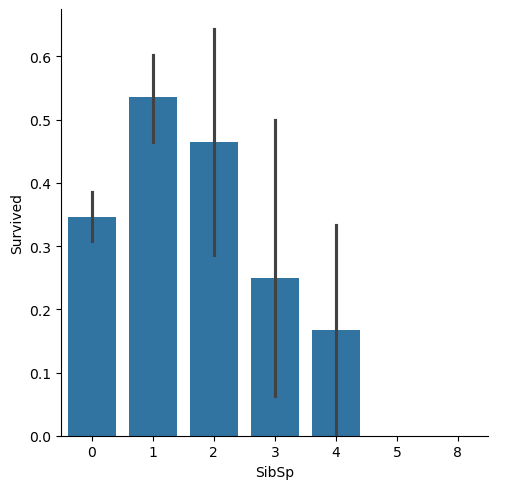

In [130]:
_ = sns.catplot(df, x="SibSp", y="Survived", kind="bar")

- Visualize `Pclass` and `Survived`

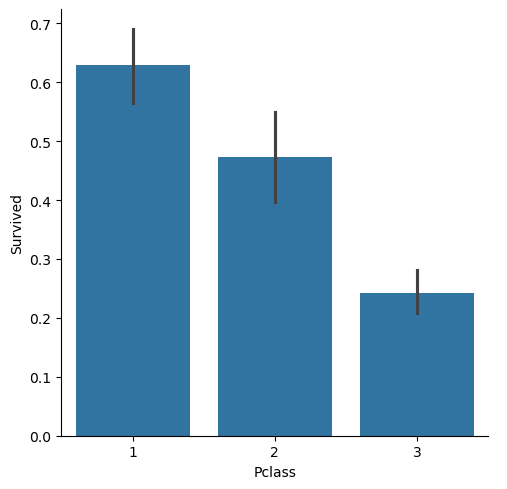

In [131]:
_ = sns.catplot(df, x="Pclass", y="Survived", kind="bar")


- Visualize `Embarked` and `Survived`

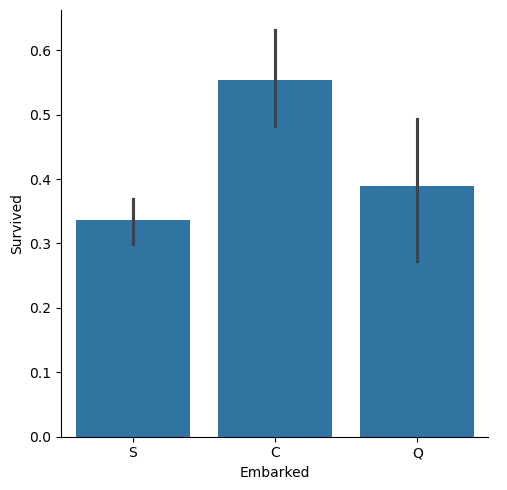

In [132]:
sns.catplot(df, x="Embarked", y="Survived", kind="bar")


- Visualize `Parch` and `Survived`

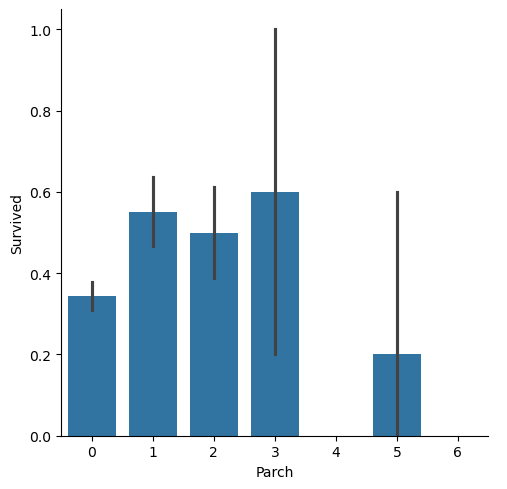

In [133]:
sns.catplot(df, x="Parch", y="Survived", kind="bar")


- Visualize `Fare` and `Survived`

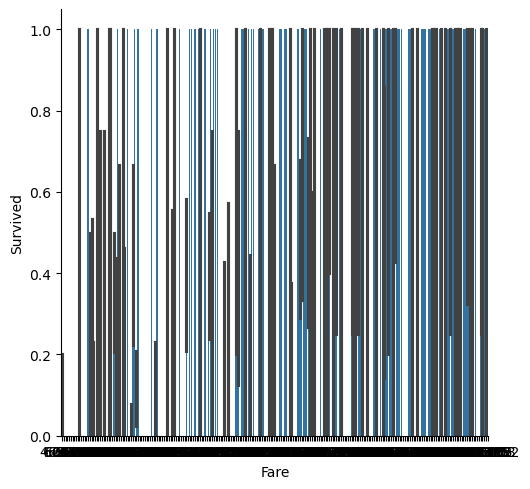

In [134]:
# Bof...
# le fare c'est le prix du billet
_ = sns.catplot(df, x="Fare", y="Survived", kind="bar")


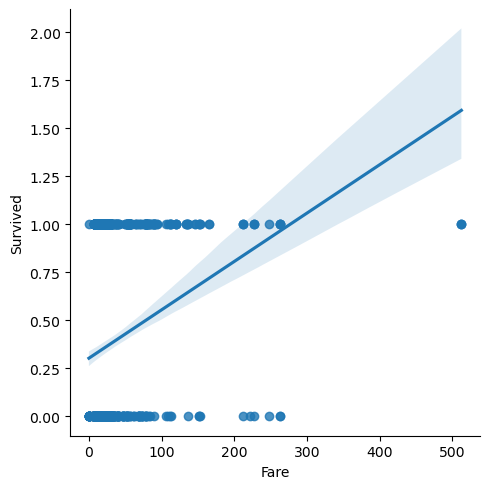

In [135]:
# Bof...
# Lire : https://www.tutorialspoint.com/seaborn/seaborn_implot_method.htm#:~:text=lmplot()%20method%20is%20used,a%20dataset%20simple%20and%20convenient.
# sns.lmplot() permet de tracer des scatter plots avec une ligne de régression linéaire ajustée. 
# Utile pour visualiser la relation entre deux variables continues et évaluer visuellement la force (pente) et la direction (+ ou -) de cette dernière

_ = sns.lmplot(df, x="Fare", y="Survived")


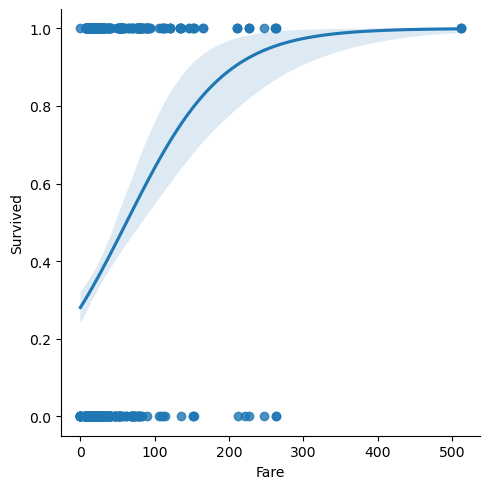

In [136]:
# logistic=True permet d'ajuster une ligne de régression logistique plutôt qu'une ligne de régression linéaire. 
# La régression logistique est utilisée lorsque la variable dépendante est binaire ou catégorielle
# elle modélise la probabilité qu'une observation appartienne à une certaine classe en fonction des variables indépendantes. 
_ = sns.lmplot(df, x="Fare", y="Survived", logistic=True)

* Show your dataset main statistics

In [137]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


Ca veut dire qu'il y a :  
* 2 NaN dans Embarked (voir 889 vs 891)
* 177 NaN dans Age (voir 714 vs 891)

On affiche les lignes où il y a des Nan dans les colonnes Embarked et Age : 

In [138]:
print(df[df['Embarked'].isna()])
print()
print(df[df['Age'].isna()])

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

     Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5           0       3    male  NaN      0      0   8.4583        Q
17          1       2    male  NaN      0      0  13.0000        S
19          1       3  female  NaN      0      0   7.2250        C
26          0       3    male  NaN      0      0   7.2250        C
28          1       3  female  NaN      0      0   7.8792        Q
..        ...     ...     ...  ...    ...    ...      ...      ...
859         0       3    male  NaN      0      0   7.2292        C
863         0       3  female  NaN      8      2  69.5500        S
868         0       3    male  NaN      0      0   9.5000        S
878         0       3    male  NaN      0      0   7.8958        S
888         0       3  female  NaN      1      2  23.4500        S


- Let's take a look to missing values

In [139]:
df.isna().sum() / len(df) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [140]:
Bob = df.isna().sum() / len(df) * 100
print(Bob.round(3))

Survived     0.000
Pclass       0.000
Sex          0.000
Age         19.865
SibSp        0.000
Parch        0.000
Fare         0.000
Embarked     0.224
dtype: float64


In [141]:
#
# ! Afficher uniquement les catégories non nulles
Bob.loc[Bob.ne(0)].round(3)

Age         19.865
Embarked     0.224
dtype: float64

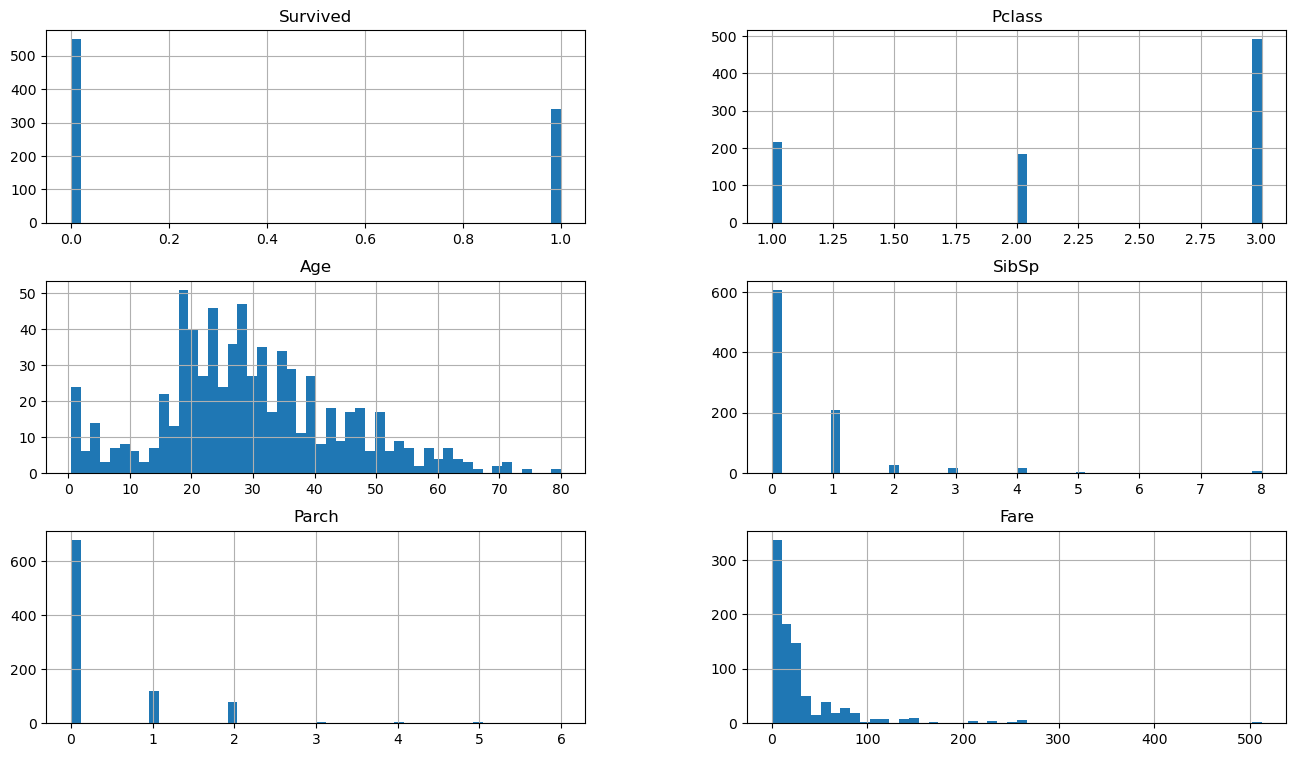

In [142]:
_ = df.hist(bins=50, figsize=(16,9))          # affiche une matrice avec tous les histogrammes 

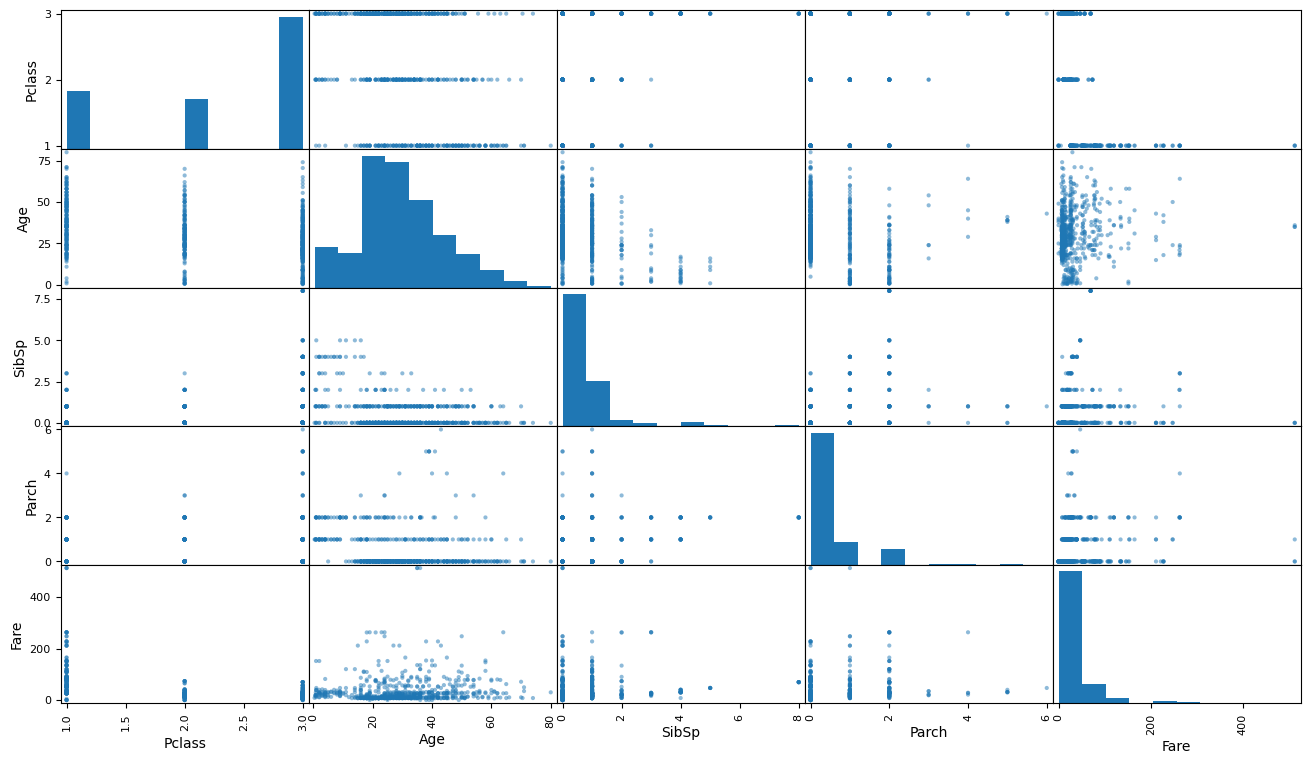

In [143]:
from pandas.plotting import scatter_matrix
features_list = ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]           
_ = scatter_matrix(df[features_list], figsize=(16, 9))


In [144]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix.round(3))
print()
print(corr_matrix["Survived"].sort_values(ascending=False).round(3))


          Survived  Pclass    Age  SibSp  Parch   Fare
Survived     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass      -0.338   1.000 -0.369  0.083  0.018 -0.549
Age         -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp       -0.035   0.083 -0.308  1.000  0.415  0.160
Parch        0.082   0.018 -0.189  0.415  1.000  0.216
Fare         0.257  -0.549  0.096  0.160  0.216  1.000

Survived    1.000
Fare        0.257
Parch       0.082
SibSp      -0.035
Age        -0.077
Pclass     -0.338
Name: Survived, dtype: float64


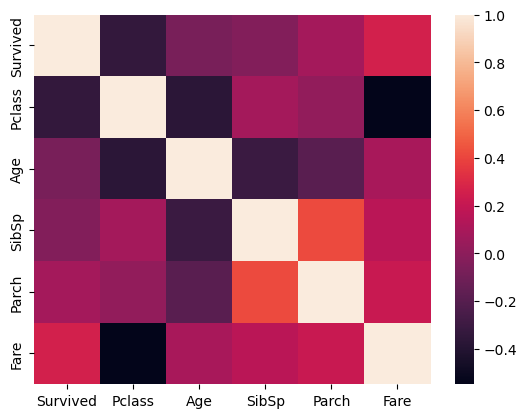

In [145]:
sns.heatmap(df.corr(numeric_only=True));                        # voir le ; à la fin de la ligne c'est équivalent à _ = ...

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [146]:
# Survived	
# Pclass	Sex	Age	SibSp	Parch	Fare	Embarked

y = df.loc[:,"Survived"]   
 
features_list = ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]           
X = df.loc[:,features_list]                                    

# On pourrait faire plus simple pour X avec un drop de la colonne "Survived"


- Split your data in train and test sets

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

In [148]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
502,3,female,NaN,0,0,7.6292,Q
464,3,male,NaN,0,0,8.0500,S
198,3,female,NaN,0,0,7.7500,Q
765,1,female,51.0,1,0,77.9583,S
421,3,male,21.0,0,0,7.7333,Q


* Deal with missing values 
    * you can replace missing values in numerical columns by the median 
    * you can replace missing values in categorical columns by a new category called "*Unknown*"
    * Check out [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer) documentation to do so 😉

In [149]:
X_train.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [150]:
# Copy X_train to avoid caveats
#X_train = X_train.copy() # utile en 2023 ?

# Create an imputer for numerical columns 
numerical_imputer = SimpleImputer(strategy="mean")

# Apply it on "Age" column. 
# ! Voir le X[["Age"]] afin d'obtnir un 2D array au lieu de 1D
X_train[["Age"]] = numerical_imputer.fit_transform(X_train[["Age"]])

# Dans la colonne Embarked on remplace les valeurs manquantes par une catégorie "Unknown"
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown") 
X_train[["Embarked"]] = categorical_imputer.fit_transform(X_train[["Embarked"]])


In [151]:
X_train.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

- Make all the required preprocessings on the train set

In [152]:
print(X_train.head())

# Rappel : ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]  
numeric_features = [0, 2, 3, 4, 5] 
numeric_transformer = StandardScaler()

categorical_features = [1, 6] 
categorical_transformer = OneHotEncoder()
# Pas de changement sur le score avec ou sans drop=first
# TODO : Je pense que c'est mieux sans car dans dans la LogisticRegression y a une régulation/penalité de type l2
# ! Si on décide d'utiliser drop="first", il faut alors re-écrire le feature importance car il manque des colonnes
# categorical_transformer = OneHotEncoder(drop="first")


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:].round(2)) # print first 5 rows (not using iloc since now X_train became a numpy array)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
502       3  female  29.469823      0      0   7.6292        Q
464       3    male  29.469823      0      0   8.0500        S
198       3  female  29.469823      0      0   7.7500        Q
765       1  female  51.000000      1      0  77.9583        S
421       3    male  21.000000      0      0   7.7333        Q
[[ 1.    0.    0.    1.    0.    0.    0.83  0.   -0.49 -0.47 -0.48]
 [ 0.    1.    0.    0.    1.    0.    0.83  0.   -0.49 -0.47 -0.47]
 [ 1.    0.    0.    1.    0.    0.    0.83  0.   -0.49 -0.47 -0.48]
 [ 1.    0.    0.    0.    1.    0.   -1.56  1.68  0.46 -0.47  0.85]
 [ 0.    1.    0.    1.    0.    0.    0.83 -0.66 -0.49 -0.47 -0.48]]


## Build your model

- Create your Logistic Regression model

In [153]:
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train)                  # Fit model. Ajustement 


LogisticRegression(random_state=0)

In [154]:
y_train_pred = classifier.predict(X_train)
print(y_train_pred[0:5])

[1 0 1 1 0]


- Evaluate it (don't forget to preprocess X_test)

In [155]:
X_test[["Age"]] = numerical_imputer.transform(X_test[["Age"]])
X_test[["Embarked"]] = categorical_imputer.transform(X_test[["Embarked"]])

X_test = feature_encoder.transform(X_test)

y_test_pred = classifier.predict(X_test)
print(y_test_pred[0:5])


[0 0 0 0 1]


- Look at your model scores on train and test

In [156]:
print(classifier.score(X_train, y_train).round(3))
print(classifier.score(X_test, y_test).round(3))


0.805
0.788


- What can you say about it ?

- Create the confusion matrix with `plot_confusion_matrix`

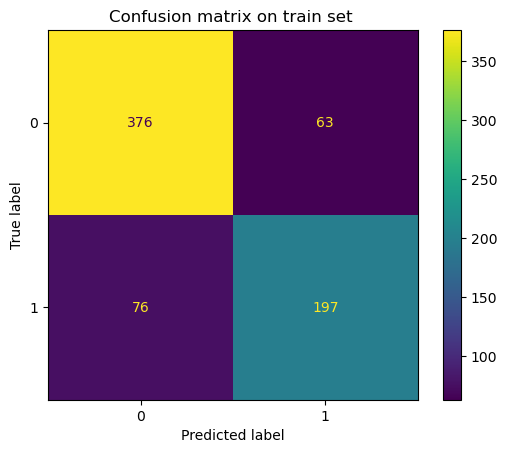

Accuracy-score on train set : 0.805


In [157]:
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 
print(f"Accuracy-score on train set : {classifier.score(X_train, y_train):.3f}")

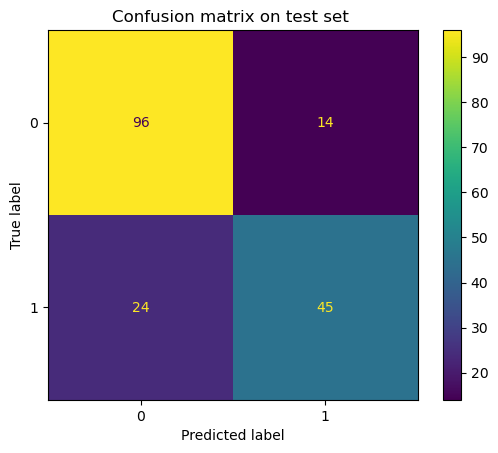

Accuracy-score on test set : 0.788


In [158]:
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 
print(f"Accuracy-score on test set : {classifier.score(X_test, y_test):.3f}")

- Create a dataframe with features importance

## Bonus - Feature Importance 🏄‍♂️

* Now harder, try to visualize the coefficients of your model and therefore deduce a feature importance ranking
* If you want to interpret coefficients, make sure you `NORMALIZED` your data in the preprocessing part

In [159]:
# C'est juste pour montrer comment on retrouve la liste des noms des features du ou des OneHotEncoder

# On accède aux transformers du ColumnTransformer feature_encoder
print("All transformers are           : ", *feature_encoder.transformers_)

# On accède au OneHotEncoder
print("One Hot Encoder transformer is : ", feature_encoder.transformers_[0][1])

# On accède aux catégories du OneHotEncoder
# Une liste de 1 ou plusieurs tableaux
# Ici il y a 2 jeux de valeurs dans 2 sous tableaux
print("One Hot Encoder categories are : ", *feature_encoder.transformers_[0][1].categories_)




All transformers are           :  ('cat', OneHotEncoder(), [1, 6]) ('num', StandardScaler(), [0, 2, 3, 4, 5])
One Hot Encoder transformer is :  OneHotEncoder()
One Hot Encoder categories are :  ['female' 'male'] ['C' 'Q' 'S' 'Unknown']


In [167]:
# On veut construire un dataframe avec 
# une colonne pour les noms des features 
# une colonne avec les valeurs des coefs associés

# On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# numeric_features = une liste avec les indices des colonnes numériques
# .columns retourne le nom des colonnes 
numerical_column_names = X.iloc[:, numeric_features].columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.coef_.squeeze()  # squeeze remove axes of length one from ndarray.
})
print(feature_importance.round(3))
print(f"Constant is             {classifier.intercept_[0]:.3f}\n")



   feature_names  coefficients
0         female         1.354
1           male        -1.354
2              C        -0.000
3              Q         0.050
4              S        -0.231
5        Unknown         0.182
6         Pclass        -0.939
7            Age        -0.526
8          SibSp        -0.379
9          Parch        -0.049
10          Fare         0.140
Constant is             -0.091



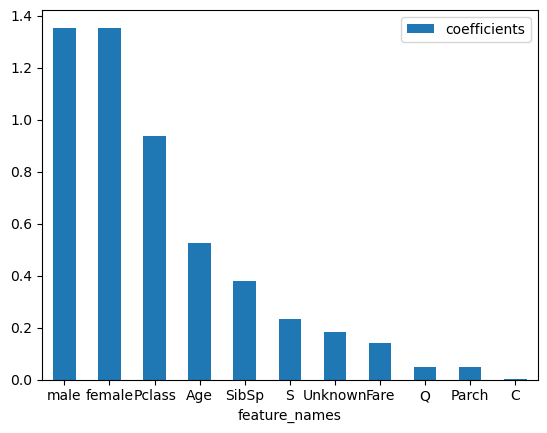

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names")
_ = plt.xticks(rotation=0)

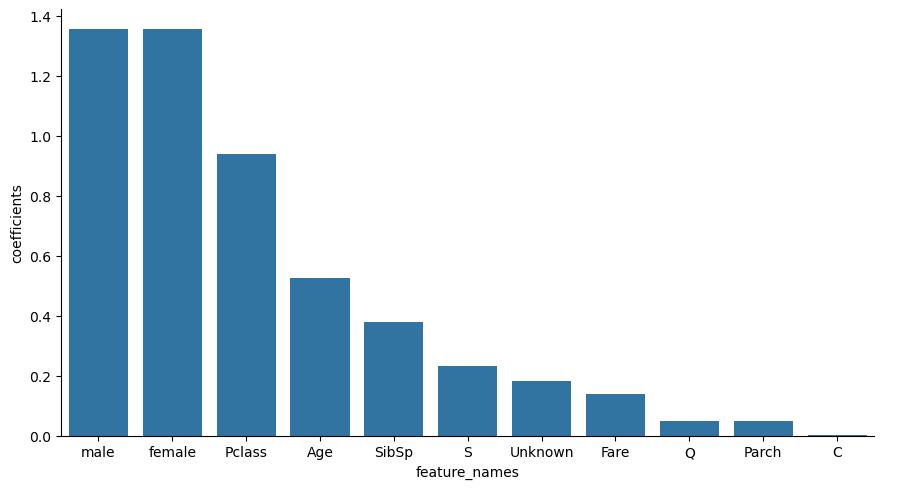

In [ ]:
sns.catplot(feature_importance.sort_values(by="coefficients", ascending=False), 
            x="feature_names", 
            y="coefficients", 
            kind="bar",
            aspect=16/9); 